<a href="https://www.kaggle.com/iamratankumar/combo-17-brighter-galaxy-analysis?scriptVersionId=84471366" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import warnings

In [2]:
!pip install eigpca
!pip install kneed

In [3]:
df = pd.read_csv('../input/combo17-galaxy-dataset/COMBO17.csv')

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df.head()

,Nr,Rmag,e.Rmag,ApDRmag,mumax,Mcz,e.Mcz,MCzml,chi2red,UjMAG,...,UFS,e.UFS,BFS,e.BFS,VFD,e.VFD,RFS,e.RFS,IFD,e.IFD
0,6,24.995,0.097,0.935,24.214,0.832,0.036,1.400,0.64,-17.67,...,0.01870,0.00239,0.01630,0.00129,0.017300,0.00141,0.01650,0.000434,0.02470,0.00483
1,9,25.013,0.181,-0.135,25.303,0.927,0.122,0.864,0.41,-18.28,...,0.00706,0.00238,0.00420,0.00115,0.003930,0.00182,0.00723,0.000500,0.00973,0.00460
2,16,24.246,0.054,0.821,23.511,1.202,0.037,1.217,0.92,-19.75,...,0.01260,0.00184,0.01830,0.00115,0.018800,0.00167,0.02880,0.000655,0.05700,0.00465
3,21,25.203,0.128,0.639,24.948,0.912,0.177,0.776,0.39,-17.83,...,0.01410,0.00186,0.01180,0.00110,0.009670,0.00204,0.01050,0.000416,0.01340,0.00330
4,26,25.504,0.112,-1.588,24.934,0.848,0.067,1.330,1.45,-17.69,...,0.00514,0.00170,0.00102,0.00127,0.000039,0.00160,0.00139,0.000499,0.00590,0.00444


In [6]:
df.shape

(3462, 65)

In [7]:
df = df.dropna()
df.shape

(3438, 65)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3438 entries, 0 to 3461
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nr        3438 non-null   int64  
 1   Rmag      3438 non-null   float64
 2   e.Rmag    3438 non-null   float64
 3   ApDRmag   3438 non-null   float64
 4   mumax     3438 non-null   float64
 5   Mcz       3438 non-null   float64
 6   e.Mcz     3438 non-null   float64
 7   MCzml     3438 non-null   float64
 8   chi2red   3438 non-null   float64
 9   UjMAG     3438 non-null   float64
 10  e.UjMAG   3438 non-null   float64
 11  BjMAG     3438 non-null   float64
 12  e.BjMAG   3438 non-null   float64
 13  VjMAG     3438 non-null   float64
 14  e.VjMAG   3438 non-null   float64
 15  usMAG     3438 non-null   float64
 16  e.usMAG   3438 non-null   float64
 17  gsMAG     3438 non-null   float64
 18  e.gsMAG   3438 non-null   float64
 19  rsMAG     3438 non-null   float64
 20  e.rsMAG   3438 non-null   floa

In [9]:
useless_features=[]
for f in df.columns:
    if f[0] == 'e':
        useless_features.append(f)
        

In [10]:
df.drop(useless_features, axis='columns', inplace=True)

In [11]:
df.head(1)

,Nr,Rmag,ApDRmag,mumax,Mcz,MCzml,chi2red,UjMAG,BjMAG,VjMAG,...,W753FE,W815FS,W856FD,W914FD,W914FE,UFS,BFS,VFD,RFS,IFD
0,6,24.995,0.935,24.214,0.832,1.4,0.64,-17.67,-17.54,-17.76,...,0.0245,0.0216,0.0244,0.0377,0.0117,0.0187,0.0163,0.0173,0.0165,0.0247


Detecting Outlaiers

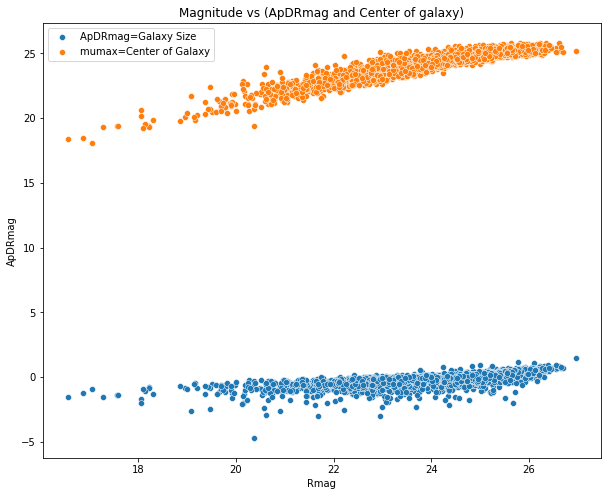

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.Rmag, df.ApDRmag, label="ApDRmag=Galaxy Size")
sns.scatterplot(df.Rmag, df.mumax, label="mumax=Center of Galaxy")
plt.title("Magnitude vs (ApDRmag and Center of galaxy)")
plt.legend()

Text(0.5, 1.0, 'Main Features comparing by chi-square line')

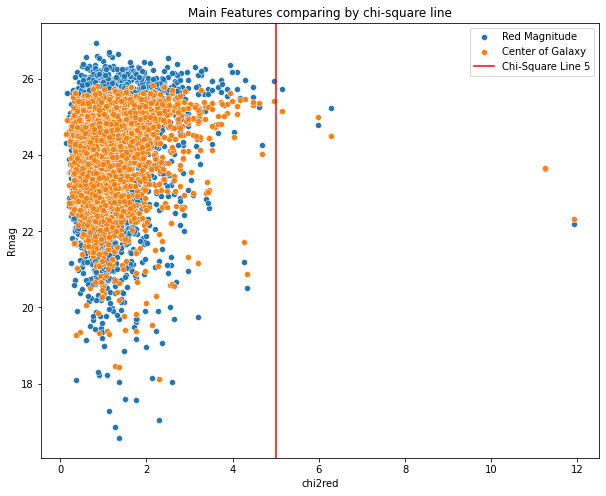

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.chi2red,df.Rmag, label="Red Magnitude")
sns.scatterplot(df.chi2red,df.mumax, label="Center of Galaxy")
#sns.scatterplot(df.chi2red,df.ApDRmag, label="Difference btw R Band & Magnitude")
plt.axvline(x=5, label="Chi-Square Line 5", c='r')
plt.legend()
plt.title("Main Features comparing by chi-square line")



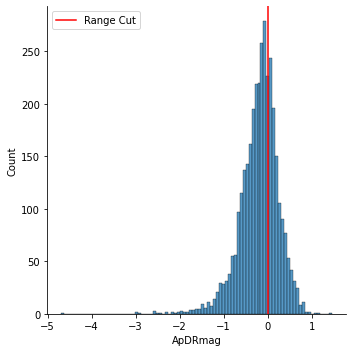

In [14]:
sns.displot(df.ApDRmag)
plt.axvline(x=0, c='r', label="Range Cut")
plt.legend()

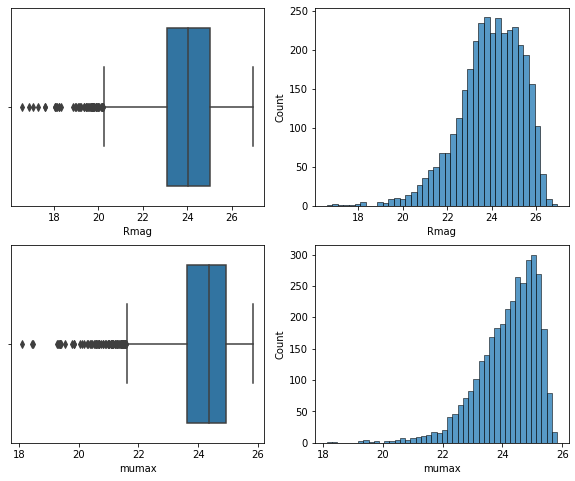

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
sns.boxplot(df.Rmag, ax=ax[0,0])
sns.histplot(df.Rmag, ax=ax[0,1]);
sns.boxplot(df.mumax, ax=ax[1,0])
sns.histplot(df.mumax, ax=ax[1,1]);

In [16]:
df = df[df.chi2red<5]
df = df[df.ApDRmag>=0]
df = df[df.mumax>=20]
df.shape

(1170, 35)

Text(0.5, 1.0, 'Correletion matrix of Features')

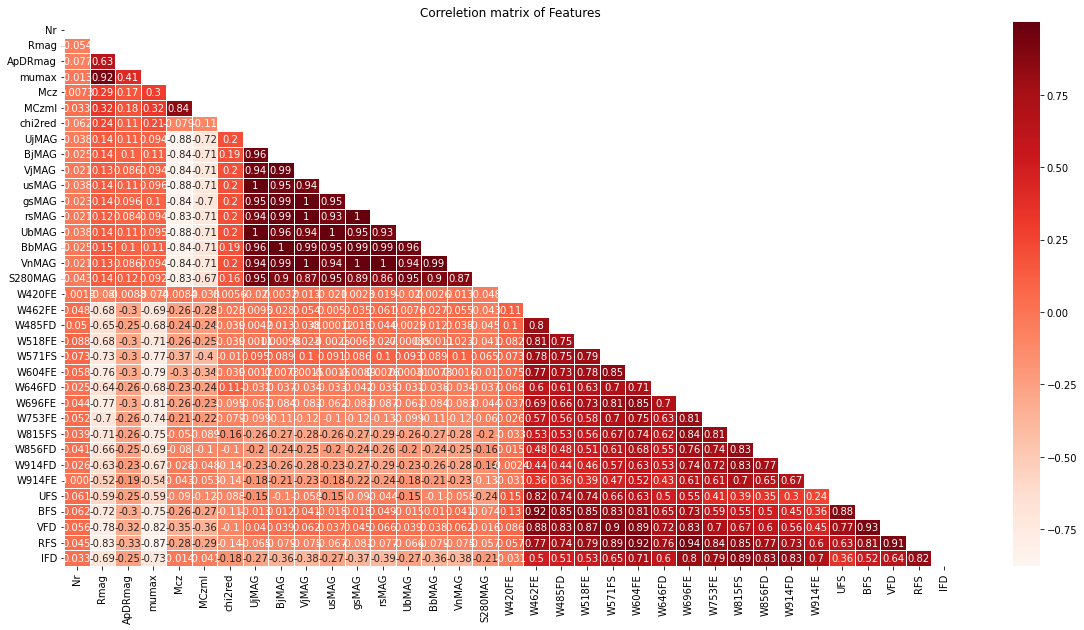

In [17]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(cor, dtype=np.bool))
sns.heatmap(cor, annot=True, cmap="Reds", mask=mask, linewidth=0.5)
plt.title("Correletion matrix of Features")

In [18]:
#Scaling data for Below Graph Plotting and Clustring
scaler = MinMaxScaler()
# transform data
scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns, index=df.index) 
scaled.head(1)

,Nr,Rmag,ApDRmag,mumax,Mcz,MCzml,chi2red,UjMAG,BjMAG,VjMAG,...,W753FE,W815FS,W856FD,W914FD,W914FE,UFS,BFS,VFD,RFS,IFD
0,0.0,0.624569,0.639535,0.620754,0.631907,1.0,0.10166,0.254125,0.265587,0.289844,...,0.179187,0.132676,0.174524,0.243335,0.16811,0.266007,0.202239,0.183487,0.099627,0.140821


In [19]:
from eigpca import PCA


eigpca = PCA()
eigpca.fit(scaled)

eigpca.explained_variance_ratio_

array([3.97979101e-01, 3.18327761e-01, 6.03127523e-02, 3.49050850e-02,
       2.86805828e-02, 2.73122561e-02, 2.68976917e-02, 1.34611179e-02,
       1.07487787e-02, 9.89837126e-03, 9.00953012e-03, 7.98236746e-03,
       7.12745585e-03, 6.53088013e-03, 6.19104960e-03, 5.98014969e-03,
       4.89309954e-03, 4.29893011e-03, 3.88216912e-03, 3.62227521e-03,
       2.84634895e-03, 2.12510127e-03, 1.57740542e-03, 1.50110272e-03,
       1.18470605e-03, 9.17993862e-04, 7.40296652e-04, 5.52746939e-04,
       4.70606255e-04, 3.72372175e-05, 3.62852398e-06, 1.17321178e-06,
       9.90071975e-08, 8.13183529e-08, 6.82647950e-08])

Text(0.5, 1.0, 'Eigen Values of PCA')

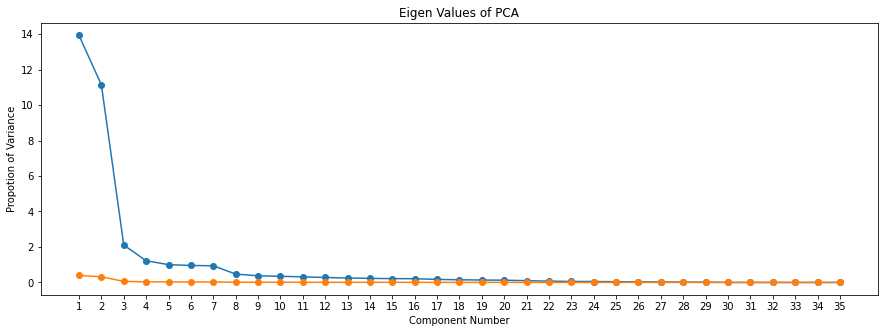

In [20]:
plt.figure(figsize=(15,5))
eigpca.plot(y='eig')
eigpca.plot(y='pov')
plt.title("Eigen Values of PCA")

In [21]:
from sklearn.decomposition import PCA

column_list = scaled.columns.tolist()
spca = PCA(4)
out_pca = spca.fit_transform(scaled[column_list])
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2', 'pca3', 'pca4'])


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def kmeans_clustring(data, limit):
    
    sse=[]
    silhouette_coefficient=[]
    for k in range(1,limit):
        kmeans = KMeans(n_clusters = k, init='k-means++', n_init=50, max_iter=500, random_state=42 )
        kmeans.fit(data)
        kmeans.y_kmn =  kmeans.fit_predict(out_pca)
        kmeans.clusters = kmeans.cluster_centers_
        sse.append(kmeans.inertia_)
        
    return kmeans, sse

kmeans, sse = kmeans_clustring(data=df_pca, limit=13)

In [23]:
kmeans.cluster_centers_

array([[-0.34205321,  0.06839859,  0.27148294, -0.06956034],
       [ 1.05374332,  0.37537188,  0.0986479 , -0.00426436],
       [-0.13789675, -0.2660048 , -0.01482924,  0.08575043],
       [-0.44064723,  0.05104455, -0.21551508, -0.02555367],
       [ 1.29058758, -0.0416233 , -0.25966151, -0.05548346],
       [-0.11916294, -0.17109548, -0.35355228,  0.01485758],
       [ 0.19999844,  2.20884842, -0.00762482,  0.87655921],
       [-0.11744255, -0.26050434,  0.32466503,  0.01837362],
       [-0.13981448,  0.3471124 , -0.15774641, -0.1207312 ],
       [ 0.39739687,  0.54025413,  0.08652383, -0.07759182],
       [ 1.53506752, -0.22671654,  0.20076071,  0.03288343],
       [-0.47211538,  0.73017693,  0.1657628 ,  0.08254285]])

In [24]:
sse

[645.1405624207305,
 335.09918043155517,
 262.64673108524096,
 213.32982824470855,
 188.4204850052321,
 171.26649414711633,
 156.54979905394973,
 143.4560309323208,
 133.95273083085638,
 126.08284092188995,
 119.66912186609275,
 113.57505616032562]

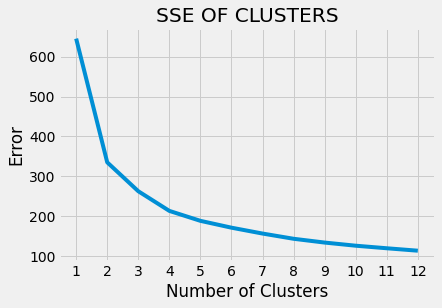

In [25]:

plt.style.use('fivethirtyeight')
plt.plot(range(1,13), sse)
plt.xticks(range(1,13))
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.title("SSE OF CLUSTERS")
plt.show()


In [26]:
from sklearn.metrics import silhouette_score
def s_score(data):
    silhouette_coefficient = []
    for k in range(2,13):
        kmeans = KMeans(n_clusters = k, init='k-means++', n_init=30, max_iter=500, random_state=42 )
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficient.append(score)
    return silhouette_coefficient
s_score = s_score(data=df_pca)

In [27]:
s_score

[0.5718575504256521,
 0.34782245829984765,
 0.3119732553827454,
 0.30205607502469584,
 0.29221420197454934,
 0.2603393016055867,
 0.24231111328942415,
 0.23992229350458197,
 0.22622415319293399,
 0.21934583941458807,
 0.22007537191936313]

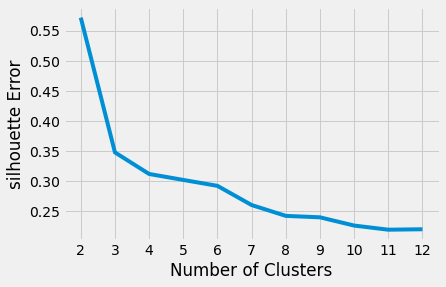

In [28]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,13), s_score)
plt.xticks(range(2,13))
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette Error')
plt.show()

In [29]:
from kneed import KneeLocator
knee = KneeLocator(range(1,13), sse, curve = 'convex', direction = 'decreasing')
print(f'Cluster points: {knee.elbow}')

Cluster points: 4


In [30]:
from sklearn.cluster import DBSCAN

def dbscan_cluster(dataset):
    silhouette_coefficient=[]
  #setting radius for core points
    for radius in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    #setting number of points inside the radius
        for n_samples in [2,3,4,5,6,7,8,9,10]:
            dbscan = DBSCAN(eps=radius,min_samples = n_samples)
            dbscan.fit(dataset)
            score = silhouette_score(dataset, dbscan.labels_)
            silhouette_coefficient.append(score)
    print(f'radius-0.1: {max(silhouette_coefficient[:9])}, {len(silhouette_coefficient[:9])}')
    print(f'radius-0.2: {max(silhouette_coefficient[9:18])}, {len(silhouette_coefficient[9:18])}')
    print(f'radius-0.3: {max(silhouette_coefficient[18:27])}, {len(silhouette_coefficient[18:27])}')
    print(f'radius-0.4: {max(silhouette_coefficient[27:36])}, {len(silhouette_coefficient[27:36])}')
    print(f'radius-0.5: {max(silhouette_coefficient[36:45])}, {len(silhouette_coefficient[36:45])}')
    print(f'radius-0.6: {max(silhouette_coefficient[45:54])}, {len(silhouette_coefficient[45:54])}')
    print(f'radius-0.7: {max(silhouette_coefficient[54:63])}, {len(silhouette_coefficient[54:63])}')
    print(f'radius-0.8: {max(silhouette_coefficient[63:72])}, {len(silhouette_coefficient[63:72])}')
    print(f'radius-0.9: {max(silhouette_coefficient[72:81])}, {len(silhouette_coefficient[72:81])}')

In [31]:
dbscan_cluster(df_pca)

radius-0.1: -0.3539114299191538, 9
radius-0.2: 0.4463249210248632, 9
radius-0.3: 0.48729031565098124, 9
radius-0.4: 0.588990323411522, 9
radius-0.5: 0.644614294577061, 9
radius-0.6: 0.644614294577061, 9
radius-0.7: 0.67140874334388, 9
radius-0.8: 0.6895696359800023, 9
radius-0.9: 0.7373941889146873, 9


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
kmns, sse = kmeans_clustring(data=df_pca, limit=4)

In [34]:
from sklearn.svm import SVC
print('Support vector score of Regularization')
def svc_model(data, y_pridict):
    X_train, X_test, y_train, y_test = train_test_split(data, y_pridict, test_size=0.2, random_state=21)
    for x in range(1,8):
        svc = SVC(C=x)
        svc.fit(X_train, y_train)
        print('score of  Regularization ',x, ': ',svc.score(X_test,y_test))

svc_model(scaled, kmns.labels_)



Support vector score of Regularization
score of  Regularization  1 :  0.9829059829059829
score of  Regularization  2 :  0.9871794871794872
score of  Regularization  3 :  0.9786324786324786
score of  Regularization  4 :  0.9829059829059829
score of  Regularization  5 :  0.9829059829059829
score of  Regularization  6 :  0.9829059829059829
score of  Regularization  7 :  0.9786324786324786


In [35]:
def svc_model_gamma(data, y_pridict):
    X_train, X_test, y_train, y_test = train_test_split(data, y_pridict, test_size=0.2, random_state=21)
    for x in range(1,10):
        svc = SVC(gamma=x)
        svc.fit(X_train, y_train)
        print('score of  Gamma ',x, ': ',svc.score(X_test,y_test))

svc_model_gamma(scaled, kmns.labels_)

score of  Gamma  1 :  0.9786324786324786
score of  Gamma  2 :  0.9786324786324786
score of  Gamma  3 :  0.9743589743589743
score of  Gamma  4 :  0.9658119658119658
score of  Gamma  5 :  0.9572649572649573
score of  Gamma  6 :  0.9444444444444444
score of  Gamma  7 :  0.9444444444444444
score of  Gamma  8 :  0.9444444444444444
score of  Gamma  9 :  0.9487179487179487


In [36]:



def svc_model_kernel(data, y_pridict):
    X_train, X_test, y_train, y_test = train_test_split(data, y_pridict, test_size=0.2, random_state=21)
    model_linear_kernal = SVC(kernel='linear')
    model_linear_kernal.fit(X_train, y_train)
    yhat =  model_linear_kernal.predict(X_test)
    print('score of SVC Linear Kernel: ',model_linear_kernal.score(X_test, y_test))
    print("SVC Linear Kernel Accuracy: " + str(accuracy_score(y_test, yhat)))
    print(classification_report(y_test,yhat))
    print('Confussion Matrix ofSVC Linear Kernel')
    print(confusion_matrix(y_test, yhat))
    
    sns.heatmap(confusion_matrix(y_test, yhat), annot=True, fmt='d')
    plt.xlabel('Predicted Value')
    plt.ylabel('Truth Value')
    


score of SVC Linear Kernel:  0.9829059829059829
SVC Linear Kernel Accuracy: 0.9829059829059829
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.97      1.00      0.98        30
           2       0.99      0.99      0.99       157

    accuracy                           0.98       234
   macro avg       0.98      0.98      0.98       234
weighted avg       0.98      0.98      0.98       234

Confussion Matrix ofSVC Linear Kernel
[[ 44   1   2]
 [  0  30   0]
 [  1   0 156]]


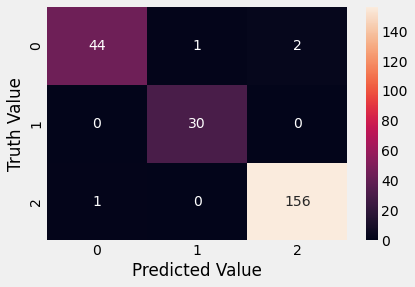

In [37]:
svc_model_kernel(scaled, kmns.labels_)

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

def sdgp(data, y_pridict):
    X_train, X_test, y_train, y_test = train_test_split(data, y_pridict, test_size=0.2, random_state=21)
    clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    SDG_model = clf.fit(X_train, y_train)
    yhat = SDG_model.predict(X_test)

    print("SDG Pipelined Classifiers accuracy with TF-IDF: " + str(accuracy_score(y_test, yhat)))
    print(classification_report(y_test,yhat))
    print('The Confusion matrix for SDG Pipelined Classifier is')
    print(confusion_matrix(y_test, yhat))

In [39]:
sdgp(scaled, kmns.labels_)

SDG Pipelined Classifiers accuracy with TF-IDF: 0.9529914529914529
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        47
           1       0.97      0.97      0.97        30
           2       0.97      0.96      0.97       157

    accuracy                           0.95       234
   macro avg       0.94      0.95      0.94       234
weighted avg       0.95      0.95      0.95       234

The Confusion matrix for SDG Pipelined Classifier is
[[ 43   1   3]
 [  0  29   1]
 [  6   0 151]]


In [40]:
from sklearn.ensemble import RandomForestClassifier
def r_forest(dataframe, y_pridicted):
    X_train, X_test, y_train, y_test = train_test_split(dataframe, y_pridicted, test_size=0.3, random_state=1, stratify=y_pridicted)
    forest = RandomForestClassifier(criterion='gini',n_estimators=5,random_state=1, n_jobs=2)
    #
    # Fit the model
    #
    forest.fit(X_train, y_train)

    #
    # Measure model performance
    #
    y_pred = forest.predict(X_test)
    print('score of Random Forest: ',forest.score(X_test, y_test))
    print("Accuracy for Random Forest: " + str(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test,y_pred))
    print('The Confusion matrix for Random Forest')
    print(confusion_matrix(y_test, y_pred))

In [41]:
r_forest(scaled, kmns.labels_)

score of Random Forest:  0.9658119658119658
Accuracy for Random Forest: 0.9658119658119658
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        73
           1       1.00      0.94      0.97        51
           2       0.98      0.98      0.98       227

    accuracy                           0.97       351
   macro avg       0.96      0.95      0.96       351
weighted avg       0.97      0.97      0.97       351

The Confusion matrix for Random Forest
[[ 69   0   4]
 [  2  48   1]
 [  5   0 222]]
